# Cohort Analysis and Customer Segmentation Project


### 











# Introduction

A Cohort is simply a group of people with shared characteristics.
Cohort analysis is a type of behavioral analytics in which you group your users based on their shared traits to better track and understand their actions over a specified period. Cohort analysis allows you to ask more specific, targeted questions and make informed product decisions that will reduce churn and drastically increase revenue.
Customer segmentation is the act of dividing customers into groups such that each group has similar characteristics. Customer segmentation could be based on customer location, demographics, or behavior.


## Problem Statements

An e-commerce giant wants to improve its product offerings, customer relations and also maximize profit.
To achieve this, the company wants to calculate the percentage of customers it's able to retain every month.
The company also needs to segment its customers for target marketing and promotions.


## Objectives

The project objectives are:
1.	To calculate customer retention rate.
2.	To segment the customers based on their behavior. The behavior under consideration includes customers’ recent transactions with the company, the frequency of purchases, and how much each customer spends on the company products.
3.	To analyze customer segments based on Recency, Frequency, and Monetary value.


## Definitions of metrics used

Recency (R) refers to the days elapsed since the last purchase.
It is calculated by deducting the date that the customer made the last purchase from the offset date (the assumed date when the analysis was carried out).

Frequency (F) refers to the total number of transactions a customer has made with the company.
It represents how often a customer purchased a product/product from the company. It is calculated by counting the number of complete purchases a customer has made with the company.

Monetary (M) refers to the sum of a customer’s monies on the company's products.
It is calculated by multiplying the number of products by the unit price of products.


In [1]:
##Importing the necessary packages

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline




## Exploratory Data Analysis and Data Cleaning

In [2]:
# load the data

df = pd.read_csv("sample - Superstore.csv", parse_dates = ["Order Date","Ship Date"], encoding = "latin1")

In [3]:
# Display first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Display last few rows
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


## 1. About the dataset

In [5]:
# Show all columns
for col in df.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [6]:
# Checking the the number of columns and rows of the data 
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")


There are 9994 rows and 21 columns in the dataset.


### 2.Exploratory data analysis, data cleaning, and Feature engineering

The data has 21 columns. Row ID and default pandas index are the same. Hence Row ID is dropped.

In [7]:
# Drop Row ID
df.drop('Row ID' ,inplace = True, axis = 1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
# Re-checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")


There are 9994 rows and 20 columns in the dataset.


#### Inspecting the data

In [9]:
# Display the first 5 rows of the dataset 
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
# Display the last 5 rows of the dataset 
df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


#### Check the info for various colunms and datatype

In [11]:
# Generate the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

There are no missing values. Data types for for all columns are correct except postal code which is in int.

In [12]:
# Converting Postal Code column to strings

df['Postal Code'] = df['Postal Code'].astype('str')
df['Postal Code'].dtype

dtype('O')

#### Check the summary statistics of the data

In [13]:
# Describe the dataset

df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


#### Check for duplicates

In [14]:
# Check for duplicates

duplicates = df.duplicated()

In [15]:
df[duplicates]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [16]:
df.shape

(9994, 20)

There is a complete duplicate of Row ID 3406 in 3407. One row is dropped.

In [17]:
# Drop the duplicate

df.drop_duplicates(inplace = True)

In [18]:
# Recheck for exiting duplicates

df.shape

(9993, 20)

#### Check for missing values

In [19]:
# Check the sum of all missing values in the data

df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no missing values in the data

### Inspecting and exploring various columns of the data

In [20]:
categorical_var = df.select_dtypes(include = "object")
numerical_var = df.select_dtypes(include = np.number)

In [21]:
# Iterate all Categorical Variables in the data

for col in categorical_var.columns:
    print(col)

Order ID
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name


### Create a function to explore the categorical variable

This is to easily explore the numerical and graphical nature of the categorical variables

In [22]:
# Create a function named "explore_categorical_var" to explore the categorical variables of the data

def explore_categorical_var(df, x):
    
    """ To return the numerical and graphical summary of 
    categorical variables by taking df and x as argument """
    
    nunique_categories = df[x].nunique()
    if nunique_categories <= 6 :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        sns.countplot(df[x])
        plt.title(x)
        plt.show()
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")
        print("===============================")
        print(f"Missing values: {df[x].isnull().sum()}")
        
    elif nunique_categories > 6 and nunique_categories <= 17 :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        sns.countplot(y = df[x])
        plt.title(x)
        plt.show()
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")
        print("===============================")
        print(f"Missing values: {df[x].isnull().sum()}")
        
    else :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")
        print("===============================")
        print(f"Missing values: {df[x].isnull().sum()}")

#### Explore Order ID column of the date

In [23]:
# Output the head of "Order ID"

df["Order ID"].head()

0    CA-2016-152156
1    CA-2016-152156
2    CA-2016-138688
3    US-2015-108966
4    US-2015-108966
Name: Order ID, dtype: object

In [24]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Order ID")

Summary
count               9993
unique              5009
top       CA-2017-100111
freq                  14
Name: Order ID, dtype: object 

Value count 

CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2016-105732    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64 

Missing values: 0


#### Explore Ship Mode column of the date

In [25]:
# Output  the head of "Ship Mode"

df["Ship Mode"].head()

0      Second Class
1      Second Class
2      Second Class
3    Standard Class
4    Standard Class
Name: Ship Mode, dtype: object

Summary
count               9993
unique                 4
top       Standard Class
freq                5967
Name: Ship Mode, dtype: object 



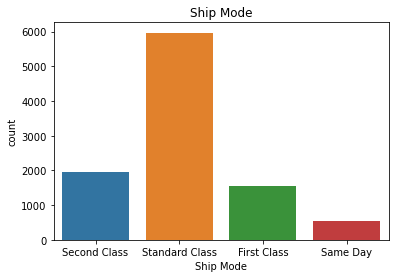

Value count 

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64 

Missing values: 0


In [26]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Ship Mode")

#### Explore Customer ID column of the date

In [27]:
# Output the head of "Customer ID"

df["Customer ID"].head()

0    CG-12520
1    CG-12520
2    DV-13045
3    SO-20335
4    SO-20335
Name: Customer ID, dtype: object

In [28]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Customer ID")

Summary
count         9993
unique         793
top       WB-21850
freq            37
Name: Customer ID, dtype: object 

Value count 

WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: Customer ID, Length: 793, dtype: int64 

Missing values: 0


#### Explore Customer Name column of the date

In [29]:
# Output the head of "Customer Name"
df["Customer Name"].head()

0        Claire Gute
1        Claire Gute
2    Darrin Van Huff
3     Sean O'Donnell
4     Sean O'Donnell
Name: Customer Name, dtype: object

In [30]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Customer Name")

Summary
count              9993
unique              793
top       William Brown
freq                 37
Name: Customer Name, dtype: object 

Value count 

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: Customer Name, Length: 793, dtype: int64 

Missing values: 0


#### Explore Segment column of the date

In [31]:
# Output the head of "Segment"

df["Segment"].head()

0     Consumer
1     Consumer
2    Corporate
3     Consumer
4     Consumer
Name: Segment, dtype: object

Summary
count         9993
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object 



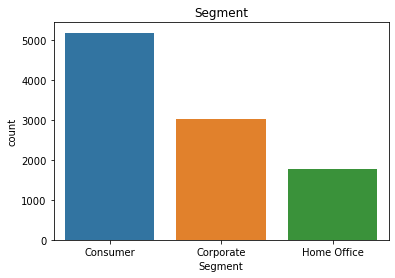

Value count 

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segment, dtype: int64 

Missing values: 0


In [32]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Segment")

#### Explore Country column of the date

In [33]:
# Output the head of "Country"

df["Country"].head()

0    United States
1    United States
2    United States
3    United States
4    United States
Name: Country, dtype: object

Summary
count              9993
unique                1
top       United States
freq               9993
Name: Country, dtype: object 



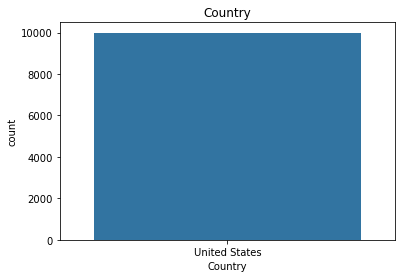

Value count 

United States    9993
Name: Country, dtype: int64 

Missing values: 0


In [34]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Country")

#### Explore City column of the data 

In [35]:
# Output the head of "City"

df["City"].head()

0          Henderson
1          Henderson
2        Los Angeles
3    Fort Lauderdale
4    Fort Lauderdale
Name: City, dtype: object

In [36]:

# Call the "explore_categorical_var" function

explore_categorical_var(df, "City")

Summary
count              9993
unique              531
top       New York City
freq                915
Name: City, dtype: object 

Value count 

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64 

Missing values: 0


#### Explore the  State column of the data

In [37]:
# Output the head of "State"

df["State"].head()

0      Kentucky
1      Kentucky
2    California
3       Florida
4       Florida
Name: State, dtype: object

In [38]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "State")

Summary
count           9993
unique            49
top       California
freq            2001
Name: State, dtype: object 

Value count 

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     468
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island            

#### Explore Region column of the data



In [39]:
# Output the head

df["Region"].head()

0    South
1    South
2     West
3    South
4    South
Name: Region, dtype: object

Summary
count     9993
unique       4
top       West
freq      3203
Name: Region, dtype: object 



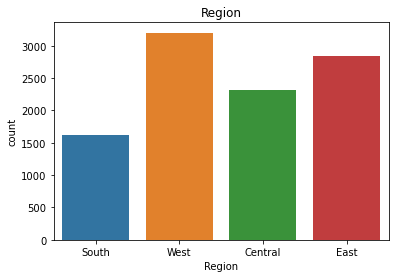

Value count 

West       3203
East       2847
Central    2323
South      1620
Name: Region, dtype: int64 

Missing values: 0


In [40]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Region")

#### Explore the Product ID column of the data

In [41]:
# Output the head

df["Product ID"].head()

0    FUR-BO-10001798
1    FUR-CH-10000454
2    OFF-LA-10000240
3    FUR-TA-10000577
4    OFF-ST-10000760
Name: Product ID, dtype: object

In [42]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Product ID")

Summary
count                9993
unique               1862
top       OFF-PA-10001970
freq                   19
Name: Product ID, dtype: object 

Value count 

OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
FUR-CH-10001146    15
                   ..
TEC-PH-10003535     1
TEC-MA-10002937     1
OFF-AR-10004974     1
TEC-AC-10004814     1
OFF-ST-10001627     1
Name: Product ID, Length: 1862, dtype: int64 

Missing values: 0


#### Explore the Category column of the data

In [43]:
# Output the head

df["Category"].head()

0          Furniture
1          Furniture
2    Office Supplies
3          Furniture
4    Office Supplies
Name: Category, dtype: object

Summary
count                9993
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object 



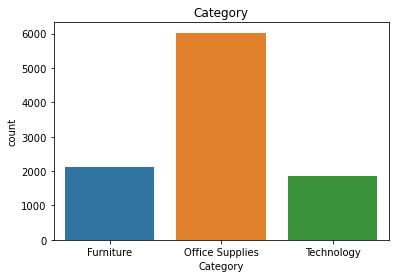

Value count 

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64 

Missing values: 0


In [44]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Category")

#### Explore the Sub-Category column of the data

In [45]:
# Output the head

df["Sub-Category"].head()

0    Bookcases
1       Chairs
2       Labels
3       Tables
4      Storage
Name: Sub-Category, dtype: object

Summary
count        9993
unique         17
top       Binders
freq         1523
Name: Sub-Category, dtype: object 



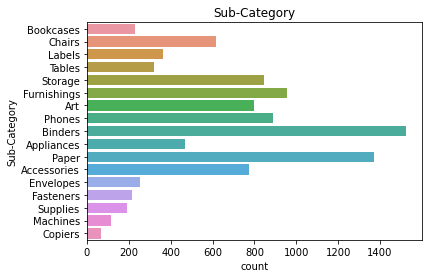

Value count 

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64 

Missing values: 0


In [46]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Sub-Category" )

#### Explore the Product Name column of the data

In [47]:
# Output head

df["Product Name"].head()

0                    Bush Somerset Collection Bookcase
1    Hon Deluxe Fabric Upholstered Stacking Chairs,...
2    Self-Adhesive Address Labels for Typewriters b...
3        Bretford CR4500 Series Slim Rectangular Table
4                       Eldon Fold 'N Roll Cart System
Name: Product Name, dtype: object

In [48]:
# Call the "explore_categorical_var" function

explore_categorical_var(df, "Product Name")

Summary
count                9993
unique               1850
top       Staple envelope
freq                   48
Name: Product Name, dtype: object 

Value count 

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                  

### Exploring the Numerical Variables

In [49]:
# Output the columns of the numerical variables

for col in numerical_var :
    print(col)

Sales
Quantity
Discount
Profit


### Create a function to explore the numerical variables

In [50]:
def explor_numerical_var(df, x) :
    
    """ To return the numerical and graphical summary of 
    numerical variables by taking df and x as argument """
        
    print("Summary statistics \n")
    print(df[x].apply([len, min, max, np.mean, np.median, np.std]))
    print("=================================================")
    print(f"Missing values: {df[x].isnull().sum()}")
    print("==================================================")
    plt.figure(figsize = (8, 4))
    #Plot a box plot
    meanpointdrop = dict(marker = "D", markeredgecolor ="black", markerfacecolor ="firebrick")
    medianprops = dict(linestyle ="-.", linewidth = 3, color="gold")
    plt.subplot(1,2,1)
    plt.boxplot(df[x], vert = True, patch_artist = True, notch = True,
            showmeans = True, medianprops = medianprops, meanprops = meanpointdrop)
    plt.xlabel(df[x].name)
    plt.title("Boxplot")

    # plotting a histogram
    plt.subplot(1,2,2)
    plt.hist(df[x], bins = 10)
    plt.title("Histogram")
    plt.tight_layout()
    plt.show()

#### Explore Sales column of the date

In [51]:
# Output the head of Sales

df["Sales"].head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

Summary statistics 

len        9993.000000
min           0.444000
max       22638.480000
mean        229.852846
median       54.480000
std         623.276074
Name: Sales, dtype: float64
Missing values: 0


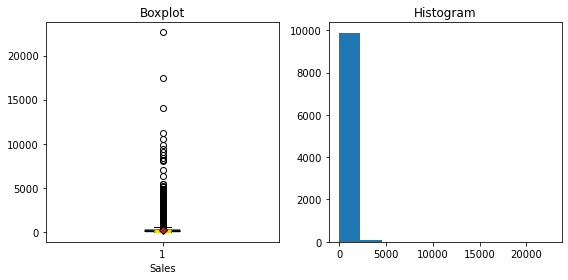

In [52]:
# Call explor_numerical_var function

explor_numerical_var(df, "Sales")

##### Further insight of the Sales column

In [53]:
# Output the maximum sales row

max_sale =np.where(df["Sales"]== df["Sales"].max())
df.iloc[max_sale]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784


In [54]:
# Output the minimum sales row

min_sale =np.where(df['Sales']== df['Sales'].min())
df.iloc[min_sale]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4101,US-2017-102288,2017-06-19,2017-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.11


The maximum sales is justified by the product(Cisco TelePresence System EX90 Videoconferenci) that was bought. A discount of 50% was given.
The minimum sales is also justified. A high discount of 80% was given but only one item was bought.

#### Explore Quantity column of the date

In [55]:
# Output head

df["Quantity"].head()

0    2
1    3
2    2
3    5
4    2
Name: Quantity, dtype: int64

Summary statistics 

len       9993.000000
min          1.000000
max         14.000000
mean         3.789753
median       3.000000
std          2.225149
Name: Quantity, dtype: float64
Missing values: 0


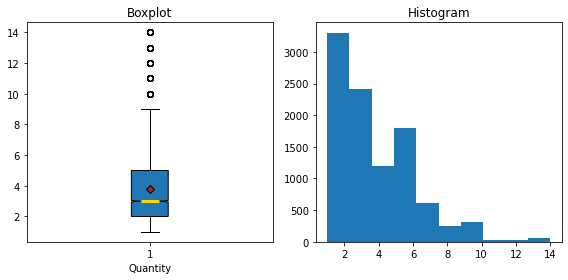

In [56]:
# Call explor_numerical_var function

explor_numerical_var(df, "Quantity")

#### Explore Profit column of the date

In [57]:
# Output the head

df["Profit"].head()

0     41.9136
1    219.5820
2      6.8714
3   -383.0310
4      2.5164
Name: Profit, dtype: float64

Summary statistics 

len       9993.000000
min      -6599.978000
max       8399.976000
mean        28.660971
median       8.671000
std        234.271476
Name: Profit, dtype: float64
Missing values: 0


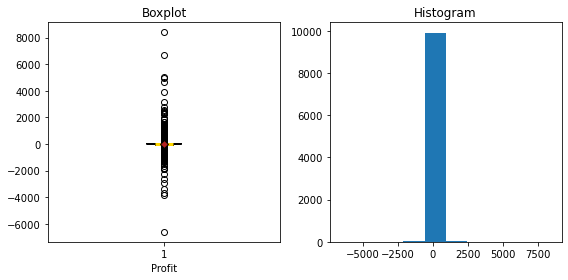

In [58]:
# Call explor_numerical_var function

explor_numerical_var(df, "Profit")

##### Further insight of the Profit column

In [59]:
# Output the maximum profit row

max_profit = np.where(df['Profit'] == df['Profit'].max())
df.iloc[max_profit]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976


In [60]:
# Output the minimum profit row

min_profit =np.where(df['Profit']== df['Profit'].min())
df.iloc[min_profit]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978


#### Explore Discount column of the data

In [61]:
# Output the head

df["Discount"].head()

0    0.00
1    0.00
2    0.00
3    0.45
4    0.20
Name: Discount, dtype: float64

Summary statistics 

len       9993.000000
min          0.000000
max          0.800000
mean         0.156188
median       0.200000
std          0.206457
Name: Discount, dtype: float64
Missing values: 0


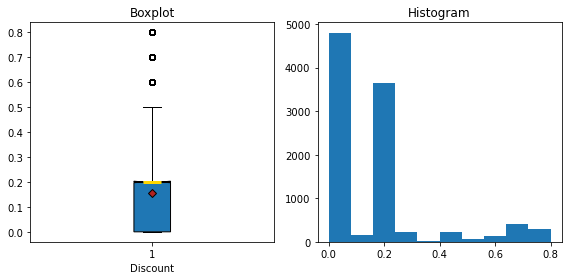

In [62]:
# Call explore_numerical_var function

explor_numerical_var(df, "Discount")

#### Feature Engineering (Adding additional columns to the dataset)

In [63]:
# Computing Original sales prices for each column and storing it as a column

df["Original Sales"] = round(df["Sales"]/(1 - df["Discount"]), 2)

In [64]:
# Compute the Unit Price as a column

df["Unit Price"]= round(df["Original Sales"]/df["Quantity"], 2)

### Time-based cohort analysis 

This phase involves calculating and visualizing the retention rate for each cohort.

#### Analysis of Cohort for the year 2017

In [65]:
# Extract 2017 from the Sales Dataset

df["Year"] = pd.DatetimeIndex(df["Order Date"]).year

data_2017 = np.where(df["Year"] == 2017)

data = df.iloc[data_2017]

#### Create InvoiceDay and CohortDay columns

In [66]:
print(f"The year 2017 has {data.shape[0]} rows of data.")

The year 2017 has 3312 rows of data.


In [67]:
# Create a function name get_day to trancate the day

def get_day(x):
    """To convert a datetype column into day"""
    
    return dt.datetime(x.year, x.month, x.day)

In [68]:
# Create InvoiceDay column

data["InvoiceDay"] = data["Order Date"].apply(get_day) 
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Original Sales,Unit Price,Year,InvoiceDay
12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,Paper,Xerox 1967,15.552,3,0.2,5.4432,19.44,6.48,2017,2017-04-15
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,101.96,50.98,2017,2017-07-16
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,...,Paper,Easy-staple paper,29.472,3,0.2,9.9468,36.84,12.28,2017,2017-10-19
41,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,...,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,183.96,45.99,2017,2017-09-10
43,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,...,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,119.52,59.76,2017,2017-09-19


In [69]:
# Group by CustomerID and select the InvoiceDay value

grouping = data.groupby("Customer ID")["InvoiceDay"] 

In [70]:
# Assign a minimum InvoiceDay value to the dataset

data["CohortDay"] = grouping.transform("min")
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Original Sales,Unit Price,Year,InvoiceDay,CohortDay
12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,Xerox 1967,15.552,3,0.2,5.4432,19.44,6.48,2017,2017-04-15,2017-04-15
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,101.96,50.98,2017,2017-07-16,2017-07-16
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,...,Easy-staple paper,29.472,3,0.2,9.9468,36.84,12.28,2017,2017-10-19,2017-10-19
41,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,...,Panasonic Kx-TS550,147.168,4,0.2,16.5564,183.96,45.99,2017,2017-09-10,2017-06-10
43,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,...,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,119.52,59.76,2017,2017-09-19,2017-02-24


#### Create InvoiceMonth and CohortMonth columns

In [71]:
# Create a function name get_month to trancate the month

def get_month(x):
    """To convert a datetype column into month"""
    return dt.datetime(x.year, x.month, 1)

In [72]:
# Create InvoiceMonth column
data["InvoiceMonth"] = data["Order Date"].apply(get_month) 

In [73]:
# Group by CustomerID and select the InvoiceMonth value

grouping = data.groupby("Customer ID")["InvoiceMonth"] 

In [74]:
# Assign a minimum InvoiceMonth value to the dataset

data["CohortMonth"] = grouping.transform("min")

In [75]:
# View the top 5 rows

data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Quantity,Discount,Profit,Original Sales,Unit Price,Year,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth
12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,3,0.2,5.4432,19.44,6.48,2017,2017-04-15,2017-04-15,2017-04-01,2017-04-01
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,2,0.3,-1.0196,101.96,50.98,2017,2017-07-16,2017-07-16,2017-07-01,2017-07-01
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,...,3,0.2,9.9468,36.84,12.28,2017,2017-10-19,2017-10-19,2017-10-01,2017-10-01
41,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,...,4,0.2,16.5564,183.96,45.99,2017,2017-09-10,2017-06-10,2017-09-01,2017-06-01
43,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,...,2,0.2,9.5616,119.52,59.76,2017,2017-09-19,2017-02-24,2017-09-01,2017-02-01


#### Calculating time offset in days 

Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

In [76]:
# Create a function name get_date_int get extract the date into integer

def get_date_int(data, column):
    """To take a dataframe and column name of datetype
    and return the integer value of the column"""
    
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

First, we will create 6 variables that capture the integer value of years, months and days for Invoice and Cohort Date using the get_date_int() function above

In [77]:
# Assign integer values to invoice year, month and day using the "InvoiceDay" column

invoice_year, invoice_month, invoice_day = get_date_int(data, "InvoiceDay")


# Assign integer values to invoice year, month and day using the "CohortDay" column

cohort_year, cohort_month, cohort_day = get_date_int(data,"CohortDay")

Calculate time offset in days
calculate the difference between the Invoice and Cohort dates in years, months and days separately and then calculate the total days difference between the two.

    Find the difference in years between the moment of the invoice and the moment the cohort was created.
    Find the difference in months between the moment of the invoice and the moment the cohort was created.
    Find the difference in days between the moment of the invoice and the moment the cohort was created.
    Calculate the number of days for the CohortIndex (assume 365 days in a year, and 30 days in a month).

In [78]:
# Calculate difference in years

years_diff = invoice_year - cohort_year


# Calculate difference in months

months_diff = invoice_month - cohort_month


# Calculate difference in days

days_diff = invoice_day - cohort_day

In [79]:
# Extract the difference in months from all previous values

data["CohortIndex"] = years_diff * 12 + months_diff + 1

In [80]:
# Output of the dataset

data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Discount,Profit,Original Sales,Unit Price,Year,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth,CohortIndex
12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,0.2,5.4432,19.44,6.48,2017,2017-04-15,2017-04-15,2017-04-01,2017-04-01,1
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,0.3,-1.0196,101.96,50.98,2017,2017-07-16,2017-07-16,2017-07-01,2017-07-01,1
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,...,0.2,9.9468,36.84,12.28,2017,2017-10-19,2017-10-19,2017-10-01,2017-10-01,1
41,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,...,0.2,16.5564,183.96,45.99,2017,2017-09-10,2017-06-10,2017-09-01,2017-06-01,4
43,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,...,0.2,9.5616,119.52,59.76,2017,2017-09-19,2017-02-24,2017-09-01,2017-02-01,8


Monthly active customers from each cohort


In [81]:
# Groupby "CohortMonth" and "CohortIndex" columns

grouping = data.groupby(["CohortMonth", "CohortIndex"])

In [82]:
# Count number of each group using the "CustomerID" column

cohort_data = grouping["Customer ID"].apply(pd.Series.nunique)

In [83]:
# Reset the column index

cohort_data = cohort_data.reset_index()

In [84]:
# Create a pivot table and assign to a variable called cohort_count

cohort_counts = cohort_data.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="Customer ID")

In [85]:
# Output of the cohort_counts

cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,67.0,3.0,8.0,13.0,9.0,4.0,9.0,9.0,16.0,9.0,16.0,18.0
2017-02-01,50.0,6.0,6.0,6.0,7.0,4.0,6.0,17.0,10.0,15.0,15.0,NaN
2017-03-01,101.0,13.0,15.0,13.0,15.0,14.0,27.0,20.0,27.0,23.0,NaN,NaN
2017-04-01,77.0,12.0,15.0,13.0,12.0,20.0,13.0,22.0,26.0,NaN,NaN,NaN
2017-05-01,71.0,9.0,10.0,12.0,17.0,11.0,26.0,17.0,NaN,NaN,NaN,NaN
2017-06-01,70.0,6.0,12.0,18.0,12.0,17.0,15.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,45.0,7.0,9.0,9.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,32.0,9.0,5.0,17.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,63.0,8.0,15.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Calculating Retention Rate

In [86]:
# Group the dataframe by "CohortMonth" and "CohortIndex" columns

grouping = data.groupby(["CohortMonth", "CohortIndex"])

In [87]:
# Select the first column and store it to cohort_sizes

cohort_sizes = cohort_counts.iloc[:,0]

In [88]:
# Divide the cohort count by cohort sizes along the rows

retention = cohort_counts.divide(cohort_sizes, axis=0)

# Convert retention rate to percentages

retention = (retention*100).round(1)

In [89]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,4.5,11.9,19.4,13.4,6.0,13.4,13.4,23.9,13.4,23.9,26.9
2017-02-01,100.0,12.0,12.0,12.0,14.0,8.0,12.0,34.0,20.0,30.0,30.0,NaN
2017-03-01,100.0,12.9,14.9,12.9,14.9,13.9,26.7,19.8,26.7,22.8,NaN,NaN
2017-04-01,100.0,15.6,19.5,16.9,15.6,26.0,16.9,28.6,33.8,NaN,NaN,NaN
2017-05-01,100.0,12.7,14.1,16.9,23.9,15.5,36.6,23.9,NaN,NaN,NaN,NaN
2017-06-01,100.0,8.6,17.1,25.7,17.1,24.3,21.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,15.6,20.0,20.0,22.2,24.4,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,28.1,15.6,53.1,28.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,12.7,23.8,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Generate a heatmap with the retention rate

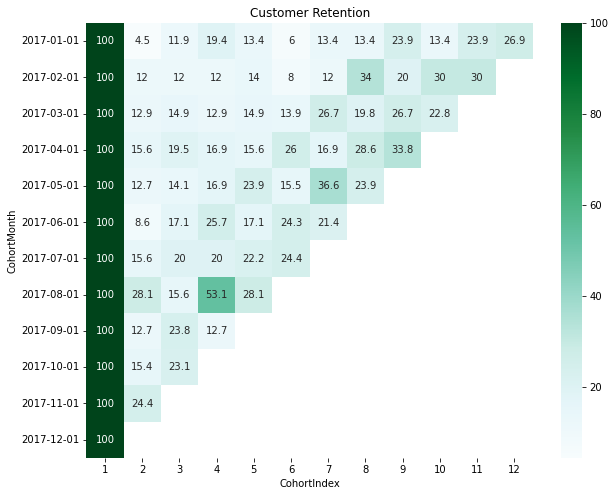

In [90]:
# Plot a haetmap using seaborn

year = ['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', 
        '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', 
        '2017-09-01', '2017-10-01','2017-11-01', '2017-12-01']

#Initialize your figure size
plt.figure(figsize=(10,8))

# Add a title
plt.title("Customer Retention")

# Create the heatmap
sns.heatmap(
            data=retention, 
            annot=True, 
            fmt = 'g',
            cmap="BuGn",
            yticklabels = year)
plt.show()

## Customer Segmentation Using K-means Clustering

### Feature Engineering

Already existing variables are transformed to build/extract metrics that reflect client behavior. These metrics include monetary value, frequency, and recency. These metrics will be used for segmentation.

#### Recency, Frequency and Monetary(RFM) Values

1. Recency: days since last customer transaction.

2. Frequency: number of transactions in the last 12 months.

3. Monetary value: total money spend in the last 12 months.

In [91]:
# Proint the minimum and the maximum "Order Date" from the dataframe

print("Min:{}; Max:{}".format(min(data["Order Date"]),max(data["Order Date"])))

Min:2017-01-01 00:00:00; Max:2017-12-30 00:00:00


The analysis is being made on 2017-12-31 as this is the last day of the year. 

In [92]:
#create a snapshot_day data as if we're doing analysis recently.

snapshot_date = max(data['Order Date']) + dt.timedelta(days=1)

snapshot_date.date()

datetime.date(2017, 12, 31)

In [93]:
# Calculate Recency, Frequency, and Monetary values for each customer 

datamart = data.groupby(["Customer ID"]).agg(
            {
            "Order Date": lambda x: (snapshot_date - x.max()).days,
            "Order ID": "count",
            "Sales": "sum"})

In [94]:
# Rename the columns

datamart.rename(columns={
                         "Order Date": "Recency",
                         "Order ID": "Frequency",
                         "Sales": "Monetary"}, 
                        inplace=True)


In [95]:
datamart.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,2,374.480
AA-10375,20,5,206.732
AA-10480,260,1,15.552
AA-10645,56,1,12.960
AB-10060,55,8,2936.264


### Data Preprocessing for k-means

At this point, the metrics are scaled, fitted, and transformed for KMeans clustering.

Key k-means assumptions

1. Symmetric distribution of variables(not skewed).

2. Variables with same average values.

3. Variables with same variance.

#### Exploring distribution of RFM

In [96]:
# Explore the summary statistics of datamart

datamart.describe().round(2)

,Recency,Frequency,Monetary
count,693.00,693.00,693.00
mean,88.34,4.78,1058.03
std,81.51,3.25,1463.91
min,1.00,1.00,1.19
25%,29.00,2.00,204.40
50%,58.00,4.00,604.91
75%,119.00,6.00,1334.64
max,363.00,20.00,14203.28


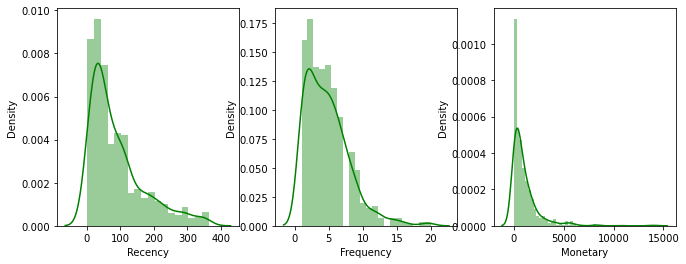

In [97]:
# Use a distplot to visualize the distribution of the data

plt.figure(figsize=(15,4))

# Plot distribution of Recency
plt.subplot(1, 4, 1) 
sns.distplot(datamart["Recency"], color = "g")


# Plot distribution of Frequency
plt.subplot(1, 4, 2) 
sns.distplot(datamart["Frequency"], color = "g")


# Plot distribution of Monetary
plt.subplot(1, 4, 3) 
sns.distplot(datamart["Monetary"], color = "g")

# Show the plot
plt.show()

The distribution of Recency, Frequency and Monetary values are right skewed. 

In [98]:
# Applying log to unskew the data

# Apply log transformation to to RFM

datamart_log = np.log(datamart)

datamart_log.describe().round(2)

,Recency,Frequency,Monetary
count,693.00,693.00,693.00
mean,3.98,1.32,6.12
std,1.13,0.74,1.54
min,0.00,0.00,0.17
25%,3.37,0.69,5.32
50%,4.06,1.39,6.41
75%,4.78,1.79,7.20
max,5.89,3.00,9.56


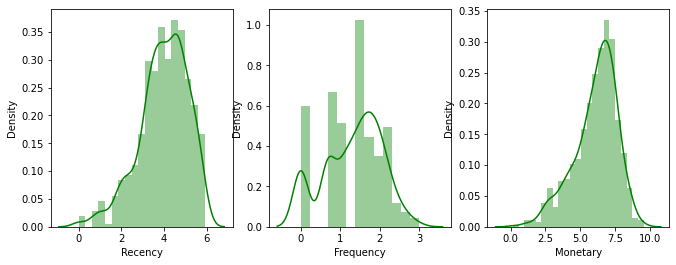

In [99]:
# Use a distplot to visualize the distribution of the data

plt.figure(figsize=(15,4))

# Plot distribution of Recency
plt.subplot(1, 4, 1) 
sns.distplot(datamart_log["Recency"], color = "g")


# Plot distribution of Frequency
plt.subplot(1, 4, 2) 
sns.distplot(datamart_log["Frequency"], color = "g")


# Plot distribution of Monetary
plt.subplot(1, 4, 3) 
sns.distplot(datamart_log["Monetary"], color = "g")


# Show the plot
plt.show()

The distribution of Recency, Frequency and Monetary values after taking log are assuming normality.

#### Scaling and Centering the data using StandardScaler 

In [100]:
# Normalize the variables

from sklearn.preprocessing import StandardScaler

# Instantiate scaler object
scaler = StandardScaler()
scaler.fit(datamart_log)

# Store for clustering
datamart_normalized = scaler.transform(datamart_log)

print("mean: ", datamart_normalized.mean(axis=0).round(2))
print("std: ", datamart_normalized.std(axis=0).round(2))

mean:  [-0.  0. -0.]
std:  [1. 1. 1.]


In [101]:
# Convert into a dataframe

datamart_normalized = pd.DataFrame(data=datamart_normalized,
                                   index=datamart_log.index, 
                                   columns=datamart_log.columns)

In [102]:
# Explore the summary statistics of datamart

datamart_normalized.describe()

,Recency,Frequency,Monetary
count,6.930000e+02,6.930000e+02,6.930000e+02
mean,-3.748805e-17,1.438644e-16,-4.677996e-17
std,1.000722e+00,1.000722e+00,1.000722e+00
min,-3.517407e+00,-1.791354e+00,-3.862901e+00
25%,-5.449444e-01,-8.509592e-01,-5.193476e-01
50%,6.692751e-02,8.943583e-02,1.853523e-01
75%,7.013388e-01,6.395317e-01,6.993322e-01
max,1.685846e+00,2.272965e+00,2.235293e+00


### Visualize the normalized variables

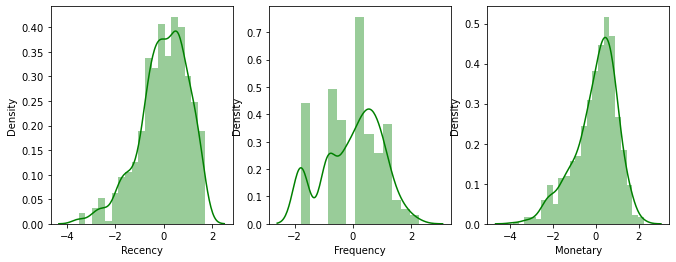

In [103]:
# Use a distplot to visualize the distribution of the data

plt.figure(figsize=(15,4))

# Plot recency distribution
plt.subplot(1, 4, 1)
sns.distplot(datamart_normalized["Recency"], color = "g")

# Plot frequency distribution
plt.subplot(1, 4, 2)
sns.distplot(datamart_normalized["Frequency"], color = "g")

# Plot monetary value distribution
plt.subplot(1, 4, 3)
sns.distplot(datamart_normalized["Monetary"], color = "g")


# Show the plot
plt.show()

### K - Means Model

#### Choosing the number of clusters

In [104]:
# Fit KMeans and calculate SSE for each k

sse = {}
for k in range(1, 15):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    # sse is sum of squared distances to closest cluster center
    sse[k] = kmeans.inertia_ 

 ##### Creating clusters using KMeans Algorithm

Clusters represent groups with similar behaviours.

A graphical approach ('the elbow method') is employed in selecting the best number of clusters.

The number of clusters at which the sum of square distances reduces insignificantly is chosen as the optimum number of clusters.

At this point, the curve seizes to bend significantly.

It is important to further investigate for clusters in the neighbourhood of the elbow coupled with their corresponding summary RFM values in order to select the approprate cluster number that best explains group behaviour.



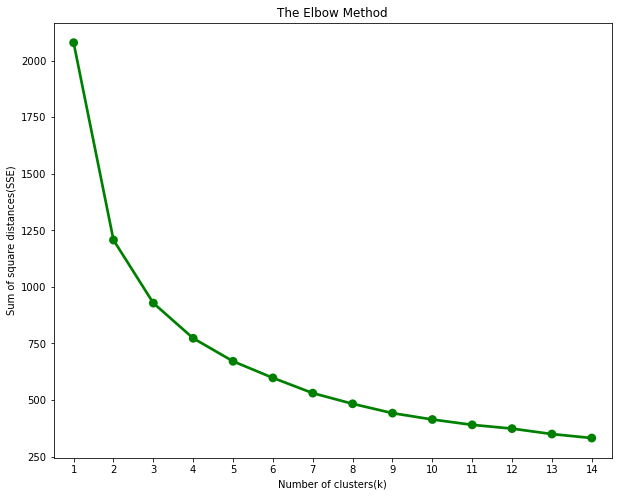

In [105]:
plt.figure(figsize = (10,8))

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), 
              y=list(sse.values()),
              color = "g")

# Add the plot title "The Elbow Method"
plt.title("The Elbow Method")

# Add X-axis label "k"
plt.xlabel("Number of clusters(k)")

# Add Y-axis label "SSE"
plt.ylabel("Sum of square distances(SSE)")


plt.show()

From the elbow diagram, recommended number of cluster is 4. However there is a need to further investigate for clusters of 3,4,5 coupled with their corresponding RFM values in order to choose the approprate cluster number that best explain customer behavior.

#### Investigating a  Cluster of 3

In [106]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [107]:
# Create a Dataframe by adding a new cluster label column
datamart_rfm_k3 = datamart.assign(Cluster = cluster_labels)

# Gruop the data by cluster
grouped = datamart_rfm_k3.groupby(["Cluster"])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    "Recency" : "mean", 
    "Frequency": "mean", "Monetary":["mean", "count"]
    }).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         100.8       5.9   1489.2   293
1         131.3       1.8    176.4   217
2          17.3       6.5   1413.1   183

#### Investigating a  Cluster of 4

In [108]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [109]:
# Create a Dataframe by adding a new cluster label column
datamart_rfm_k4 = datamart.assign(Cluster = cluster_labels)

# Gruop the data by cluster
grouped = datamart_rfm_k4.groupby(["Cluster"])

# Calculate average RFM values and segment sizes per cluster value
datamart_rfm_k4_grouped=grouped.agg({
    "Recency" : "mean", 
    "Frequency": "mean", "Monetary":["mean", "count"]
    }).round(1)
datamart_rfm_k4_grouped

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          70.4       7.3   1940.0   235
1         135.5       1.4     65.0   122
2         124.3       3.2    537.2   215
3          11.6       6.1   1271.8   121

#### Investigating a  Cluster of 5

In [110]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [111]:
# Create a Dataframe by adding a new cluster label column
datamart_rfm_k5 = datamart.assign(Cluster = cluster_labels)

# Gruop the data by cluster
grouped = datamart_rfm_k5.groupby(["Cluster"])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    "Recency" : "mean", 
    "Frequency": "mean", "Monetary":["mean", "count"]
    }).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          56.6       7.4   1918.6   219
1         170.8       1.3     89.6   107
2           9.1       7.0   1570.7    87
3          32.6       2.6    205.2    93
4         142.9       3.7    790.0   187

Based on the results above. A cluster of 4 present a more distinct grouping of customers. Hence the chosen Cluster is 4.

## Customer Persona

In [112]:
# Rename Clusters to Platinum, Gold,Silver and Bronze, 
datamart_rfm_k4['Cluster'] = datamart_rfm_k4[['Cluster']].replace(
                    {0:'Platinum', 3:'Gold', 2:'Silver', 1: 'Bronze'})
datamart_rfm_k4.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
AA-10315,185,2,374.480,Silver
AA-10375,20,5,206.732,Gold
AA-10480,260,1,15.552,Bronze
AA-10645,56,1,12.960,Bronze
AB-10060,55,8,2936.264,Platinum


In [113]:
# Gruop the data by cluster
grouped = datamart_rfm_k4.groupby(["Cluster"])

# Calculate average RFM values and segment sizes per cluster value
datamart_rfm_k4_grouped=grouped.agg({
    "Recency" : "mean", 
    "Frequency": "mean", "Monetary":["mean", "count"]
    }).round(1)
datamart_rfm_k4_grouped.sort_values(by = ('Monetary', 'mean'), ascending = False)

Recency Frequency Monetary      
            mean      mean     mean count
Cluster                                  
Platinum    70.4       7.3   1940.0   235
Gold        11.6       6.1   1271.8   121
Silver     124.3       3.2    537.2   215
Bronze     135.5       1.4     65.0   122

### Number customers per a cluster


    Platinum contains 235 customers
    Gold contains 121 customers
    Silver  contains 215 customers
    Bronze contains 122 customers


Platinum Group


1. Customers in Platinum are the most frequent buyers and purchase the company's products more than customers in the other groups.
2. On the average, they have 7 transactions with the company within the year 2017.
3. They give the highest monetary value of about 1940 on an average to the company.
4.A larger portion of the company's customers(235) fall within this group.
5. They are the second most recent buyers. On an average, the last time a customer in this group made a transaction with the company is about 2 months away from the snap-shot date.

The company must make a conscious effort to maintain customers in this group.


Gold Group

They are the second important customer group to the company.
1. They contributeed an average of 1272 towards revenue.
2. They are great with recency and frequency
3. Within a span of one year, a customer in this group makes 6 transactions on the average.
4. On an average, the last time a customer in this group made a transaction with the company is about 10 days away from the snap-shot date.


Silver Group

This is the second largest group with 215 customers.
1. They contributed an average of 537 towards revenue.
2. They are not performing well in terms of frenquency and recency. An avaerage of 3 transactions the whole year and last transaction is 4 months away from the snapshot date.

The company should research more about their preferences and devise more strategies to attract them.

 Bronze Group

The least active group in terms of all metrics.
1. Within a span of one year, customers in this group made an avarage of a single transaction contributing an average monetary value of 65 to the company. 
2. They are the least frequent and recent buyers. On an average, the last time a customer in this group made a transaction with the company is a little over 4 months away from the snap-shot date.

The company should research more about their preferences and devise more strategies to attract them.

## Visualizing clusters with regards to the metrics

### Relative importance of the RFM values within each cluster

In [114]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k4.groupby(["Cluster"]).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp =  cluster_avg/ population_avg - 1

# Print relative importance scores rounded to 2 decimals
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
Bronze,0.53,-0.71,-0.94
Gold,-0.87,0.28,0.20
Platinum,-0.20,0.53,0.83
Silver,0.41,-0.33,-0.49


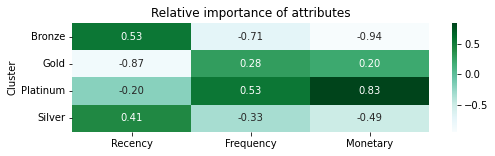

In [115]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8,2))

# Add the plot title
plt.title("Relative importance of attributes")

# Plot the heatmap
sns.heatmap(data=relative_imp, 
            annot=True,
            fmt=".2f", 
            cmap="BuGn")
plt.show()



The heatmap of the relative importance with regards to the metrics buttresses the findings from the snake plot below.


### Prepare data for the snake plot

In [116]:
datamart_normalized = pd.DataFrame(datamart_normalized,
                                   index=datamart_rfm_k4.index,
                                   columns=datamart_rfm_k4.columns)
datamart_normalized['Cluster'] = datamart_rfm_k4['Cluster']
datamart_normalized.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
AA-10315,1.090834,-0.850959,-0.126113,Silver
AA-10375,-0.872940,0.392175,-0.511995,Gold
AA-10480,1.391255,-1.791354,-2.192422,Bronze
AA-10645,0.035951,-1.791354,-2.310841,Bronze
AB-10060,0.020045,1.029831,1.211453,Platinum


In [117]:
datamart_normalized['Cluster'] = datamart_normalized[['Cluster']].replace({0:'Platinum', 3:'Gold', 2:'Silver', 1: 'Bronze'})

In [118]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                        
                        
# Assign Customer ID and Cluster as ID variables
                    id_vars=['Customer ID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value')

In [119]:
datamart_melt.head()

,Customer ID,Cluster,Metric,Value
0,AA-10315,Silver,Recency,1.090834
1,AA-10375,Gold,Recency,-0.872940
2,AA-10480,Bronze,Recency,1.391255
3,AA-10645,Bronze,Recency,0.035951
4,AB-10060,Platinum,Recency,0.020045


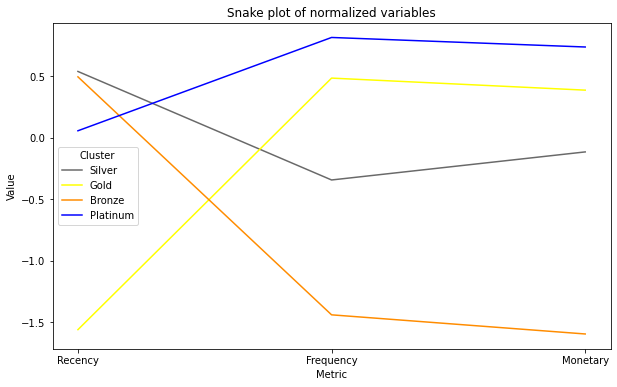

In [120]:
plt.figure(figsize = (10,6))

# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(x='Metric', y='Value', hue='Cluster', data=datamart_melt, 
             palette = ['dimgrey','yellow','darkorange','blue'], ci = None)
plt.show()

## Conclusion and recommendation

On a general note, the company has a low retention rate. This implies that customers easily churn from the company.

I therefore recommend that research should be conducted to find out why customers easily turn away from the company.

Kmeans clustering was used in grouping customers into four clusters (Groups).

Based on the results, I advise the business to conduct additional study on the Silver and Bronze Groups, which is made up of inactive customers.An in-depth investigation of their preferred products should be conducted. 

Also, for the Platinum and Gold customer groups, discount packages, loyalty packages and other customer incencentives should be made available for them to retain them.  

In order to improve target marketing, I also advise conducting further research into the products that the various clusters are associated with.


In [121]:
data['Customer ID'].sort_values().head()

1160    AA-10315
1159    AA-10315
9538    AA-10375
9539    AA-10375
6749    AA-10375
Name: Customer ID, dtype: object

In [122]:
new_data = datamart_melt.merge(data, on = 'Customer ID' )

In [123]:
new_data.head(10)

,Customer ID,Cluster,Metric,Value,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,...,Discount,Profit,Original Sales,Unit Price,Year,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth,CohortIndex
0,AA-10315,Silver,Recency,1.090834,CA-2017-147039,2017-06-29,2017-07-04,Standard Class,Alex Avila,Consumer,...,0.0,90.7350,362.94,120.98,2017,2017-06-29,2017-06-29,2017-06-01,2017-06-01,1
1,AA-10315,Silver,Recency,1.090834,CA-2017-147039,2017-06-29,2017-07-04,Standard Class,Alex Avila,Consumer,...,0.0,5.7700,11.54,5.77,2017,2017-06-29,2017-06-29,2017-06-01,2017-06-01,1
2,AA-10315,Silver,Frequency,-0.850959,CA-2017-147039,2017-06-29,2017-07-04,Standard Class,Alex Avila,Consumer,...,0.0,90.7350,362.94,120.98,2017,2017-06-29,2017-06-29,2017-06-01,2017-06-01,1
3,AA-10315,Silver,Frequency,-0.850959,CA-2017-147039,2017-06-29,2017-07-04,Standard Class,Alex Avila,Consumer,...,0.0,5.7700,11.54,5.77,2017,2017-06-29,2017-06-29,2017-06-01,2017-06-01,1
4,AA-10315,Silver,Monetary,-0.126113,CA-2017-147039,2017-06-29,2017-07-04,Standard Class,Alex Avila,Consumer,...,0.0,90.7350,362.94,120.98,2017,2017-06-29,2017-06-29,2017-06-01,2017-06-01,1
5,AA-10315,Silver,Monetary,-0.126113,CA-2017-147039,2017-06-29,2017-07-04,Standard Class,Alex Avila,Consumer,...,0.0,5.7700,11.54,5.77,2017,2017-06-29,2017-06-29,2017-06-01,2017-06-01,1
6,AA-10375,Gold,Recency,-0.872940,CA-2017-100230,2017-12-11,2017-12-15,Standard Class,Allen Armold,Consumer,...,0.2,5.0463,18.69,18.69,2017,2017-12-11,2017-09-07,2017-12-01,2017-09-01,4
7,AA-10375,Gold,Recency,-0.872940,CA-2017-100230,2017-12-11,2017-12-15,Standard Class,Allen Armold,Consumer,...,0.0,8.0730,17.94,5.98,2017,2017-12-11,2017-09-07,2017-12-01,2017-09-01,4
8,AA-10375,Gold,Recency,-0.872940,CA-2017-100230,2017-12-11,2017-12-15,Standard Class,Allen Armold,Consumer,...,0.0,29.2450,116.98,58.49,2017,2017-12-11,2017-09-07,2017-12-01,2017-09-01,4
9,AA-10375,Gold,Recency,-0.872940,US-2017-169488,2017-09-07,2017-09-09,First Class,Allen Armold,Consumer,...,0.0,7.7740,16.90,3.38,2017,2017-09-07,2017-09-07,2017-09-01,2017-09-01,1


In [124]:
new_data['Year'] = pd.to_datetime(new_data['Year'], format = '%Y')

In [125]:
new_data['Year'].head()

0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: Year, dtype: datetime64[ns]

In [126]:
new_data.to_csv('superstore.csv', index = False)